In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "Fraud"]


In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

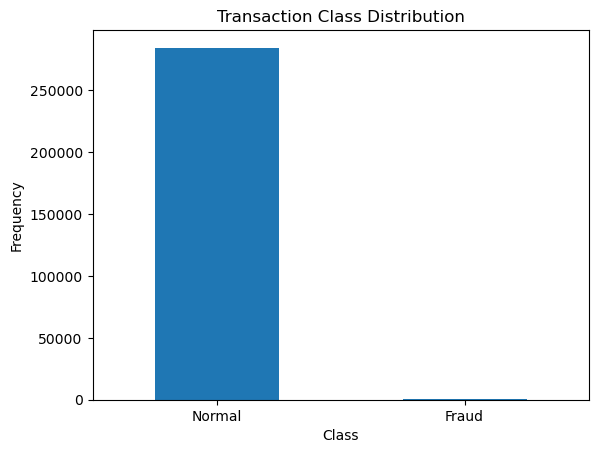

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [6]:
# Data is highly imbalanced

In [7]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

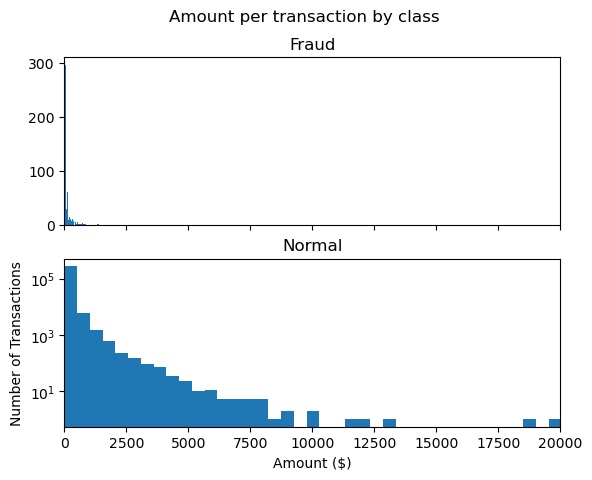

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

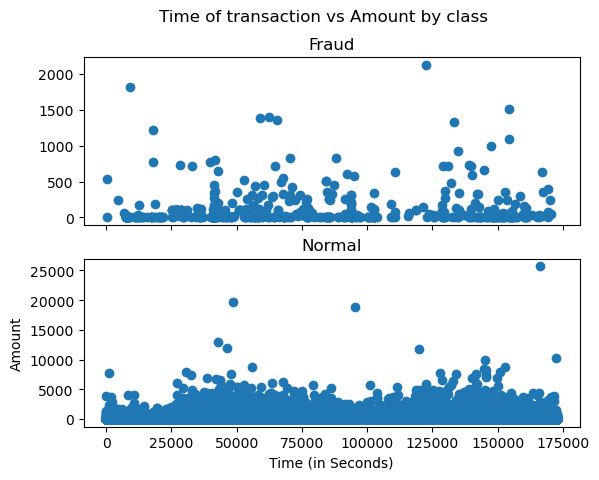

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
normal_sample = normal.sample(n=492)

In [14]:
df1 = pd.concat([normal_sample, fraud], axis=0)

In [15]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95863,65502.0,0.967724,-0.426578,-0.220598,0.022842,-0.346857,-0.765443,0.370207,-0.146527,-0.206631,...,-0.324785,-1.429206,0.022951,0.010812,0.028492,0.610272,-0.140925,0.016776,169.00,0
19479,30315.0,1.256687,-1.321863,0.458228,-1.651188,-0.868663,1.334769,-1.460241,0.599808,-1.922898,...,-0.290574,-0.469707,0.332581,-1.121114,-0.272356,-0.365710,0.092866,0.002584,24.95,0
143023,85072.0,-0.688484,0.221793,0.905957,-3.132575,2.041943,3.517382,-0.090434,0.882966,1.267209,...,-0.116153,-0.040696,-0.438283,1.003612,0.706922,-0.770105,0.193329,-0.091838,1.00,0
200165,133316.0,1.860394,-0.388436,-0.361808,1.245508,-0.413740,0.204719,-0.613923,0.168589,0.893421,...,0.284164,0.950297,0.004561,-0.469992,0.000153,-0.477735,0.051942,-0.042026,39.95,0
204207,135163.0,2.078097,0.037234,-2.040925,0.194536,0.707575,-0.785605,0.539140,-0.293462,-0.111356,...,0.151617,0.583036,0.003823,0.787762,0.348013,0.663266,-0.118386,-0.088647,0.76,0


In [17]:
df1['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [19]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [20]:
columns = df1.columns.tolist()
features = [c for c in columns if c not in ["Class"]]
target = "Class"

In [21]:
X = df1[columns]
y = df1[target]

In [22]:
print(X.shape)
print(y.shape)

(984, 31)
(984,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 31) (787, 31) (197, 31)


## Modelling


In [25]:
# USING LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
# accuracy on training data

pred = lr.predict(X_train)
accuracy = accuracy_score(pred, y_train)
print('Accuracy on Training data : ', accuracy)

Accuracy on Training data :  0.9415501905972046


In [30]:
# accuracy on test data

pred_test = lr.predict(X_test)
accuracy_test = accuracy_score(pred_test, y_test)
print('Accuracy on Test data : ', accuracy_test)

Accuracy on Test data :  0.9289340101522843
